# First diagnosis on the database for the DM group project

First, we will try to browse around the data using the first Labs as a guide...

In [31]:
# Importing the libraries necessaries for the group project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

In [2]:
# Reading the dataset and first glimpse at the rows and columns
dataset_raw = pd.read_csv(r'../data/donors.csv')
dataset_raw.head()

C:\Users\pedro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9,412) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,...,7.741935,95515,0,L,4,E,X,X,X,C
1,1,2014-01-01,BOA,1,CA,91326,,,1972-02-01,0,...,15.666667,148535,0,L,2,G,X,X,X,A
2,2,2010-01-01,AMH,1,NC,27017,,,NaN,0,...,7.481481,15078,1,L,4,E,X,X,X,C
3,3,2007-01-01,BRY,0,CA,95953,,,1948-01-01,0,...,6.812500,172556,1,L,4,E,X,X,X,C
4,4,2006-01-01,,0,FL,33176,,,1940-01-01,0,...,6.864865,7112,1,L,2,F,X,X,X,A


In [3]:
# Checking the name of the duplicated index and the using drop to have just one index
dataset_raw.columns
dataset_raw = dataset_raw.drop('Unnamed: 0', axis = 1)

In [5]:
# Using a for loop to enumerate each and every datatype in each column
for i, v in enumerate(dataset_raw.dtypes):
    print("\ncol.", i, ":  ", dataset_raw.columns[i], v, "\n")


col. 0 :   ODATEDW object 


col. 1 :   OSOURCE object 


col. 2 :   TCODE int64 


col. 3 :   STATE object 


col. 4 :   ZIP object 


col. 5 :   MAILCODE object 


col. 6 :   PVASTATE object 


col. 7 :   DOB object 


col. 8 :   NOEXCH object 


col. 9 :   RECINHSE object 


col. 10 :   RECP3 object 


col. 11 :   RECPGVG object 


col. 12 :   RECSWEEP object 


col. 13 :   MDMAUD object 


col. 14 :   DOMAIN object 


col. 15 :   HOMEOWNR object 


col. 16 :   CHILD03 object 


col. 17 :   CHILD07 object 


col. 18 :   CHILD12 object 


col. 19 :   CHILD18 object 


col. 20 :   NUMCHLD float64 


col. 21 :   INCOME float64 


col. 22 :   GENDER object 


col. 23 :   WEALTH1 float64 


col. 24 :   HIT int64 


col. 25 :   MBCRAFT float64 


col. 26 :   MBGARDEN float64 


col. 27 :   MBBOOKS float64 


col. 28 :   MBCOLECT float64 


col. 29 :   MAGFAML float64 


col. 30 :   MAGFEM float64 


col. 31 :   MAGMALE float64 


col. 32 :   PUBGARDN float64 


col. 33 :   PUBCULIN float

In [6]:
# Checking for NAs and using a loop to showcase each and every count of nas for every column.
for i, v in enumerate(dataset_raw.isna().sum()):
    if v != 0:
        print("\ncol.", i, ":  ",dataset_raw.columns[i], v,"\n")


col. 7 :   DOB 23883 


col. 20 :   NUMCHLD 83026 


col. 21 :   INCOME 21286 


col. 23 :   WEALTH1 44732 


col. 25 :   MBCRAFT 52854 


col. 26 :   MBGARDEN 52854 


col. 27 :   MBBOOKS 52854 


col. 28 :   MBCOLECT 52914 


col. 29 :   MAGFAML 52854 


col. 30 :   MAGFEM 52854 


col. 31 :   MAGMALE 52854 


col. 32 :   PUBGARDN 52854 


col. 33 :   PUBCULIN 52854 


col. 34 :   PUBHLTH 52854 


col. 35 :   PUBDOITY 52854 


col. 36 :   PUBNEWFN 52854 


col. 37 :   PUBPHOTO 52854 


col. 38 :   PUBOPP 52854 


col. 50 :   WEALTH2 43823 


col. 192 :   MSA 132 


col. 193 :   ADI 132 


col. 194 :   DMA 132 


col. 359 :   ADATE_3 1950 


col. 360 :   ADATE_4 2191 


col. 361 :   ADATE_5 33590 


col. 362 :   ADATE_6 3557 


col. 363 :   ADATE_7 8874 


col. 364 :   ADATE_8 3511 


col. 365 :   ADATE_9 11245 


col. 366 :   ADATE_10 32748 


col. 367 :   ADATE_11 10422 


col. 368 :   ADATE_12 8923 


col. 369 :   ADATE_13 40219 


col. 370 :   ADATE_14 18867 


col. 371 :   ADATE

In [7]:
# Checking duplicated rows.
dataset_raw.duplicated().sum()

0

In [8]:
dataset_raw.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ODATEDW,95412,54,2015-01-01,15358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OSOURCE,95412,896,MBC,4539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCODE,95412,NaN,NaN,NaN,54.2231,953.844,0,0,1,2,72002
STATE,95412,57,CA,17343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIP,95412,19938,85351,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
RFA_2A,95412,4,F,46964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDMAUD_R,95412,5,X,95118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDMAUD_F,95412,4,X,95118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDMAUD_A,95412,5,X,95118,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dataset_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
TCODE,95412.0,54.223117,953.844476,0.000000,0.000000,1.000000,2.000000,72002.0
NUMCHLD,12386.0,1.527773,0.806861,1.000000,1.000000,1.000000,2.000000,7.0
INCOME,74126.0,3.886248,1.854960,1.000000,2.000000,4.000000,5.000000,7.0
WEALTH1,50680.0,5.345699,2.742490,0.000000,3.000000,6.000000,8.000000,9.0
HIT,95412.0,3.321438,9.306899,0.000000,0.000000,0.000000,3.000000,241.0
...,...,...,...,...,...,...,...,...
TIMELAG,85439.0,8.093739,8.213242,0.000000,4.000000,6.000000,11.000000,1088.0
AVGGIFT,95412.0,13.347786,10.769997,1.285714,8.384615,11.636364,15.477955,1000.0
CONTROLN,95412.0,95778.176959,55284.596094,1.000000,47910.750000,95681.500000,143643.500000,191779.0
HPHONE_D,95412.0,0.500618,0.500002,0.000000,0.000000,1.000000,1.000000,1.0


In [10]:
dataset_raw[X]

NameError: name 'X' is not defined

In [ ]:
dataset_raw[X].corr(dataset_raw)

In [11]:
X = []
for i in dataset_raw.isna().sum().index:
    if dataset_raw.isna().sum()[i] != 0:
        X.append(i)
X

KeyboardInterrupt: 

In [ ]:
len(dataset_raw.isna().sum().index)

In [ ]:
dataset_raw.isna().sum() != 0

In [ ]:
# Single Metric Variable Histogram
plt.hist(dataset_raw[dataset_raw['TIMELAG'] < 40]['TIMELAG'], bins = 300)  # mess around with the bins
plt.title('TIMELAG', y = -0.2)

plt.show()

In [ ]:
dataset_raw[dataset_raw['TIMELAG'] < 40]

In [ ]:
dataset_raw.shape

In [ ]:
dataset_raw['ODATEDW'].unique()

In [47]:
dataset_raw['STATE'].unique()

array(['IL', 'CA', 'NC', 'FL', 'AL', 'IN', 'LA', 'IA', 'TN', 'KS', 'MN',
       'UT', 'MI', 'MO', 'TX', 'OR', 'WA', 'WI', 'GA', 'OK', 'SC', 'KY',
       'MD', 'SD', 'NV', 'NE', 'AZ', 'VA', 'ND', 'AK', 'AR', 'NM', 'MT',
       'MS', 'AP', 'CO', 'AA', 'HI', 'ME', 'WY', 'ID', 'OH', 'NJ', 'MA',
       'VT', 'NY', 'PA', 'DC', 'AE', 'CT', 'DE', 'WV', 'RI', 'GU', 'AS',
       'NH', 'VI'], dtype=object)

In [55]:
dataset_raw['age'] = dataset_raw['DOB'].str[:4]
#data["year_month"] = data["dataCelebracaoContrato"].dt.strftime('%Y-%m-%d').str[:7]

In [61]:
dataset_raw['age'].replace(np.nan, 0, inplace = True)

In [67]:
dataset_raw['age'] = dataset_raw['age'].astype(int)
dataset_raw['age'] = 2020 - dataset_raw['age']

In [82]:
for i in dataset_raw['age']: 
    if dataset_raw['age'][i] != 2020:
        dataset_raw['age'][i] = None

<ipython-input-82-2ddcec1d19bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_raw['age'][i] = None


In [72]:
data_wo_agena = dataset_raw[dataset_raw["age"] != 2020]

In [80]:
data_wo_agena.loc[:,["NUMCHLD", "INCOME", "WEALTH1", "WEALTH2", "age"]]
data_wo_agena.loc[:,["age"]].corr(data_wo_agena)

C:\Users\pedro\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [86]:
dataset_raw.corr()

,TCODE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,age
TCODE,1.000000,0.003457,-0.005683,-0.006437,-0.002897,-0.001160,-0.006312,-0.004113,-0.003759,-0.004298,...,0.026508,-0.012115,0.001127,-0.000010,0.004964,-0.005778,-0.001920,-0.002025,0.007835,-0.004276
NUMCHLD,0.003457,1.000000,0.022066,0.025711,0.003927,0.028935,-0.007479,-0.006664,-0.008620,0.024599,...,-0.021063,-0.018695,-0.010425,-0.002989,-0.011415,-0.018747,0.004462,0.024972,0.019857,-0.013693
INCOME,-0.005683,0.022066,1.000000,0.456094,0.004738,-0.007168,-0.035434,0.007814,0.018775,0.043737,...,-0.106561,0.096302,0.072044,0.091475,0.025956,0.114931,0.066211,-0.029094,-0.079972,-0.099457
WEALTH1,-0.006437,0.025711,0.456094,1.000000,0.020244,-0.003759,-0.024914,0.008433,0.040931,0.055357,...,-0.065309,0.072440,0.055056,0.067108,0.017545,0.086482,-0.027074,-0.017367,-0.052808,-0.065064
HIT,-0.002897,0.003927,0.004738,0.020244,1.000000,0.273154,0.190401,0.516363,0.280819,0.374718,...,0.044594,-0.029573,-0.002322,-0.007213,0.008685,-0.014705,0.000420,0.213498,-0.000448,-0.135998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AVGGIFT,-0.005778,-0.018747,0.114931,0.086482,-0.014705,-0.016241,-0.027719,0.015487,0.026210,-0.001544,...,-0.268607,0.754563,0.766810,0.784187,0.077111,1.000000,0.011507,-0.044323,-0.277168,0.029000
CONTROLN,-0.001920,0.004462,0.066211,-0.027074,0.000420,-0.001785,-0.017925,0.005684,0.003236,0.028591,...,-0.081800,0.040790,-0.011947,-0.000427,0.019095,0.011507,1.000000,-0.108747,-0.016545,0.054165
HPHONE_D,-0.002025,0.024972,-0.029094,-0.017367,0.213498,0.018020,0.013237,0.026608,0.003245,0.023108,...,0.048156,-0.048413,-0.023070,-0.029196,0.008872,-0.044323,-0.108747,1.000000,0.007607,-0.179372
RFA_2F,0.007835,0.019857,-0.079972,-0.052808,-0.000448,0.014721,0.005762,-0.013780,-0.010464,-0.008214,...,0.320665,-0.280924,-0.144174,-0.300459,-0.132972,-0.277168,-0.016545,0.007607,1.000000,0.020904


In [87]:
dsetraw_neighbors = dataset_raw.copy()

In [89]:
nans_idx = dsetraw_neighbors.isna().any(axis = 1)
dsetraw_neighbors[nans_idx]

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2,age
0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,,...,95515,0,L,4,E,X,X,X,C,63.0
1,2014-01-01,BOA,1,CA,91326,,,1972-02-01,0,,...,148535,0,L,2,G,X,X,X,A,48.0
2,2010-01-01,AMH,1,NC,27017,,,NaN,0,,...,15078,1,L,4,E,X,X,X,C,2020.0
3,2007-01-01,BRY,0,CA,95953,,,1948-01-01,0,,...,172556,1,L,4,E,X,X,X,C,NaN
4,2006-01-01,,0,FL,33176,,,1940-01-01,0,X,...,7112,1,L,2,F,X,X,X,A,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,2016-01-01,ASE,1,AK,99504,,,NaN,0,,...,184568,0,L,1,G,X,X,X,C,2020.0
95408,2016-01-01,DCD,1,TX,77379,,,1970-01-01,0,,...,122706,1,L,1,F,X,X,X,A,50.0
95409,2015-01-01,MBC,1,MI,48910,,,1958-01-01,0,,...,189641,1,L,3,E,X,X,X,B,62.0
95410,2006-01-01,PRV,0,CA,91320,,,1960-05-01,0,X,...,4693,1,L,4,F,X,X,X,A,60.0


In [110]:
dataset_raw.iloc[:,20:].dtypes

NUMCHLD     float64
INCOME      float64
GENDER       object
WEALTH1     float64
HIT           int64
             ...   
MDMAUD_R     object
MDMAUD_F     object
MDMAUD_A     object
GEOCODE2     object
age         float64
Length: 456, dtype: object

In [112]:
dataset_raw.iloc[:,22].value_counts()

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [123]:
from math import ceil

# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(35, ceil(len(dataset_raw.select_dtypes(np.number).columns.tolist()) / 35), figsize = (200, 100))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), dataset_raw.select_dtypes(np.number).columns.tolist()): # Notice the zip() function and flatten() method
    sns.boxplot(dataset_raw[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [118]:
dataset_raw.select_dtypes(np.number).columns.tolist()

Index(['TCODE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'HIT', 'MBCRAFT', 'MBGARDEN',
       'MBBOOKS', 'MBCOLECT', 'MAGFAML',
       ...
       'CARDGIFT', 'MINRAMNT', 'MAXRAMNT', 'LASTGIFT', 'TIMELAG', 'AVGGIFT',
       'CONTROLN', 'HPHONE_D', 'RFA_2F', 'age'],
      dtype='object', length=351)

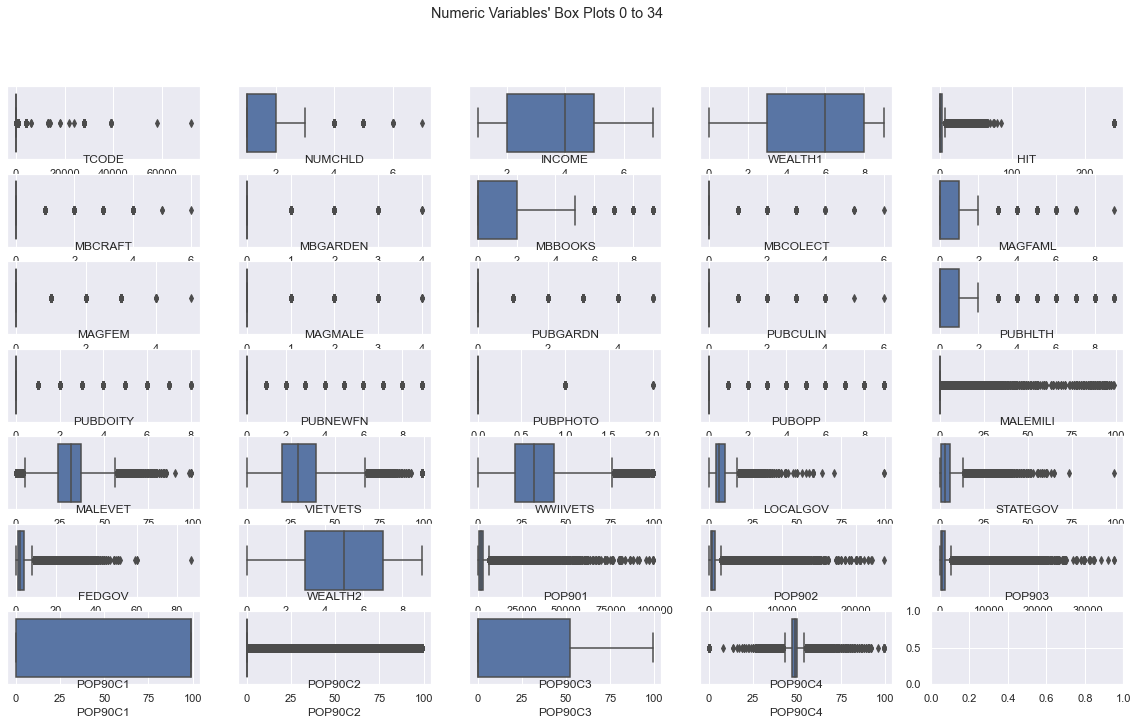

In [126]:
from math import ceil

# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(7, ceil(len(dataset_raw.select_dtypes(np.number).columns.tolist()[:34]) / 7), figsize = (20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), dataset_raw.select_dtypes(np.number).columns.tolist()[:34]): # Notice the zip() function and flatten() method
    sns.boxplot(dataset_raw[feat], ax=ax)
    ax.set_title(feat, y=-0.13)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots 0 to 34"

plt.suptitle(title)

plt.show()

In [ ]:
#DROP
TCODE


In [129]:
# DROP THESE
dataset_raw[dataset_raw['HIT'] > 200]

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2,age
1197,2008-01-01,APP,28,FL,33138,,,1952-01-01,0,X,...,191754,1,L,1,F,X,X,X,A,68.0
1891,2012-01-01,NEW,1,TX,75115,,,1971-01-01,0,X,...,191716,1,L,4,G,X,X,X,A,49.0
3171,2006-01-01,ENQ,0,IN,46910,,,1946-01-01,0,X,...,191649,1,L,4,F,X,X,X,D,74.0
3237,2010-01-01,BHG,0,CA,93455-,,,NaN,0,,...,160440,0,L,1,G,X,X,X,B,2020.0
3617,2006-01-01,GRI,0,WA,98336,,,1942-09-01,0,X,...,191758,1,L,1,F,X,X,X,C,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91289,2010-01-01,AML,1,WI,54401,,,1957-11-01,0,X,...,191680,1,L,2,E,X,X,X,C,63.0
91294,2010-01-01,DNA,1,FL,33541,,,1941-09-01,0,X,...,191726,1,L,2,E,X,X,X,A,79.0
95025,2006-01-01,AMB,2,SC,29673-,,P,1942-01-01,0,X,...,11967,0,L,2,E,X,X,X,B,78.0
95086,2011-01-01,AVN,0,CA,90806,,,NaN,0,X,...,3640,0,L,2,G,X,X,X,A,2020.0


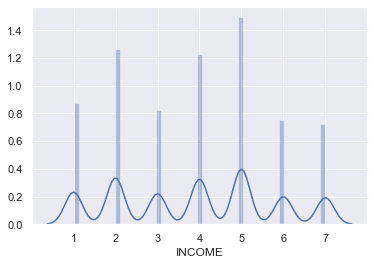

In [130]:
sns.distplot(dataset_raw['INCOME'])

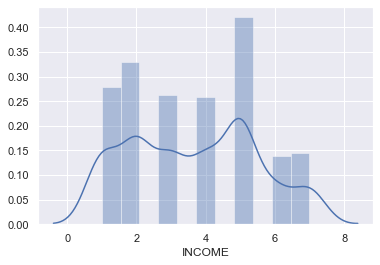

In [148]:
sns.distplot(dataset_raw[dataset_raw['STATE'] == 'AL']['INCOME'])

In [149]:
# Create a Income variable contigent on 
dataset_raw['STATE'].unique()

array(['IL', 'CA', 'NC', 'FL', 'AL', 'IN', 'LA', 'IA', 'TN', 'KS', 'MN',
       'UT', 'MI', 'MO', 'TX', 'OR', 'WA', 'WI', 'GA', 'OK', 'SC', 'KY',
       'MD', 'SD', 'NV', 'NE', 'AZ', 'VA', 'ND', 'AK', 'AR', 'NM', 'MT',
       'MS', 'AP', 'CO', 'AA', 'HI', 'ME', 'WY', 'ID', 'OH', 'NJ', 'MA',
       'VT', 'NY', 'PA', 'DC', 'AE', 'CT', 'DE', 'WV', 'RI', 'GU', 'AS',
       'NH', 'VI'], dtype=object)

In [ ]:
dataset_raw.select_dtypes(np.number).columns.tolist()

In [12]:
dataset_raw.select_dtypes(np.number)

,TCODE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,...,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F
0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,31,14,5.0,12.0,10.0,4.0,7.741935,95515,0,4
1,1,1.0,6.0,9.0,16,0.0,0.0,3.0,1.0,1.0,...,3,1,10.0,25.0,25.0,18.0,15.666667,148535,0,2
2,1,NaN,3.0,1.0,2,0.0,0.0,1.0,0.0,0.0,...,27,14,2.0,16.0,5.0,12.0,7.481481,15078,1,4
3,0,NaN,1.0,4.0,2,0.0,0.0,0.0,0.0,0.0,...,16,7,2.0,11.0,10.0,9.0,6.812500,172556,1,4
4,0,1.0,3.0,2.0,60,1.0,0.0,9.0,0.0,4.0,...,37,8,3.0,15.0,15.0,14.0,6.864865,7112,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,1,0,25.0,25.0,25.0,NaN,25.000000,184568,0,1
95408,1,1.0,7.0,9.0,1,0.0,0.0,1.0,0.0,0.0,...,1,0,20.0,20.0,20.0,NaN,20.000000,122706,1,1
95409,1,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,7,4,3.0,10.0,10.0,3.0,8.285714,189641,1,3
95410,0,NaN,7.0,NaN,0,NaN,NaN,NaN,NaN,NaN,...,41,18,5.0,21.0,18.0,4.0,12.146341,4693,1,4


In [4]:
df_central = dataset_raw.select_dtypes(np.number).copy()

In [5]:
df_central.fillna(df_central.median(), inplace=True)

In [6]:
df_central.isna().sum() 

TCODE       0
NUMCHLD     0
INCOME      0
WEALTH1     0
HIT         0
           ..
TIMELAG     0
AVGGIFT     0
CONTROLN    0
HPHONE_D    0
RFA_2F      0
Length: 350, dtype: int64

In [7]:
df_central = df_central.drop('TCODE', axis = 1)

In [8]:
pca = PCA()
pca_feat = pca.fit_transform(df_central)

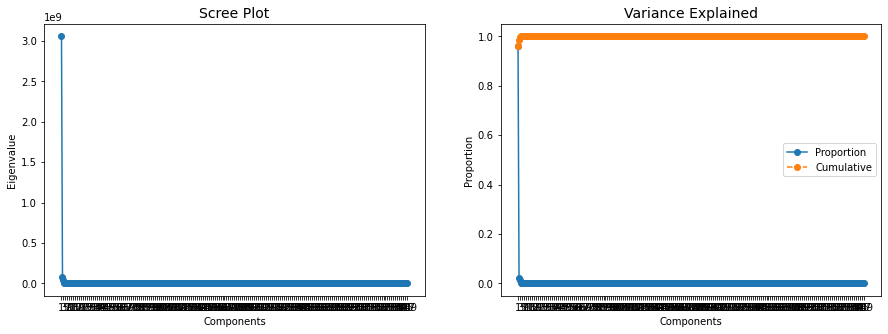

In [10]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [18]:
# Output PCA table
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)[0:10]

,Eigenvalue,Difference,Proportion,Cumulative
1,3.057385e+09,0.000000e+00,0.961584,0.961584
2,7.431706e+07,-2.983068e+09,0.023374,0.984957
3,3.935326e+07,-3.496380e+07,0.012377,0.997334
4,7.478935e+06,-3.187433e+07,0.002352,0.999687
5,6.921323e+05,-6.786802e+06,0.000218,0.999904
6,1.491622e+05,-5.429701e+05,0.000047,0.999951
7,4.537966e+04,-1.037826e+05,0.000014,0.999966
8,2.631127e+04,-1.906839e+04,0.000008,0.999974
9,1.601079e+04,-1.030048e+04,0.000005,0.999979
10,1.449701e+04,-1.513774e+03,0.000005,0.999983


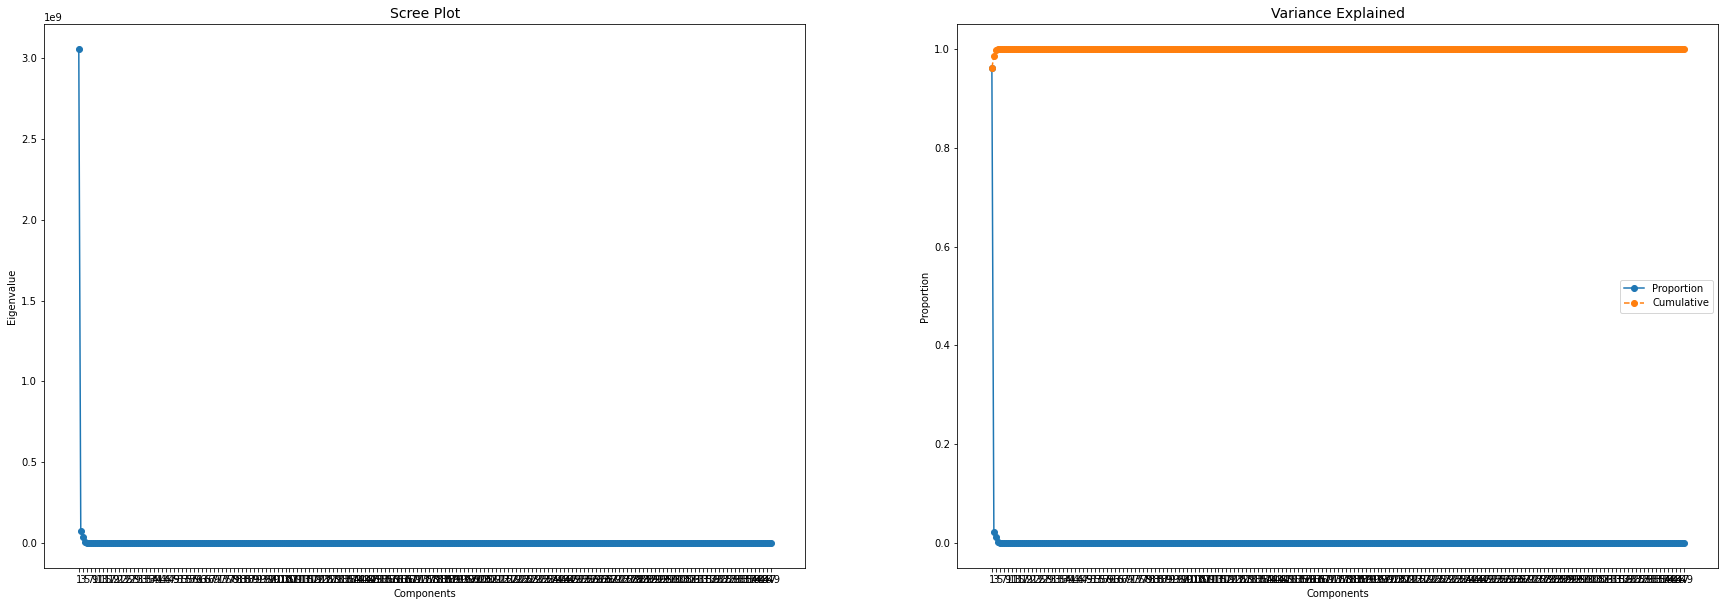

In [17]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [21]:
pca_scaled = PCA(n_components=4)
pca_feat_scaled = pca_scaled.fit_transform(df_central_scaled)
pca_feat_names_scaled = [f"PC{i}" for i in range(pca_scaled.n_components_)]
pca_df_scaled = pd.DataFrame(pca_feat_scaled, index=df_central_scaled.index, columns=pca_feat_names_scaled)  # remember index=df_pca.index
pca_df_scaled

,PC0,PC1,PC2,PC3
0,-338.337284,-3035.786436,-2663.594854,3317.081787
1,53043.945189,20297.999767,1286.298076,842.238548
2,-80792.735776,-3538.322479,3841.236221,2362.226387
3,76833.207597,-1086.175972,-2746.292328,-4987.522479
4,-88707.764009,-4574.889276,-1248.331416,-2880.590516
...,...,...,...,...
95407,88717.947314,481.376845,26662.325672,4556.174692
95408,27061.861533,10547.649626,-1743.111533,1246.367780
95409,93810.426519,-4733.075109,-3000.033739,315.320927
95410,-90989.601967,2119.462835,-1761.436528,-6330.589028


In [36]:
df_central_scaled = df_central
df_central_scaled

,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,...,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F
0,1.0,4.0,6.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,31,14,5.0,12.0,10.0,4.0,7.741935,95515,0,4
1,1.0,6.0,9.0,16,0.0,0.0,3.0,1.0,1.0,1.0,...,3,1,10.0,25.0,25.0,18.0,15.666667,148535,0,2
2,1.0,3.0,1.0,2,0.0,0.0,1.0,0.0,0.0,0.0,...,27,14,2.0,16.0,5.0,12.0,7.481481,15078,1,4
3,1.0,1.0,4.0,2,0.0,0.0,0.0,0.0,0.0,0.0,...,16,7,2.0,11.0,10.0,9.0,6.812500,172556,1,4
4,1.0,3.0,2.0,60,1.0,0.0,9.0,0.0,4.0,1.0,...,37,8,3.0,15.0,15.0,14.0,6.864865,7112,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1.0,4.0,6.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,25.0,25.0,25.0,6.0,25.000000,184568,0,1
95408,1.0,7.0,9.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,20.0,20.0,20.0,6.0,20.000000,122706,1,1
95409,1.0,4.0,6.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,7,4,3.0,10.0,10.0,3.0,8.285714,189641,1,3
95410,1.0,7.0,6.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,41,18,5.0,21.0,18.0,4.0,12.146341,4693,1,4


In [37]:
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(df_central_scaled)
df_central_scaled = scaled_feat

In [40]:
pca_scaled = PCA()
pca_feat_scaled = pca_scaled.fit_transform(df_central_scaled)

In [43]:
# Output PCA table
pd.DataFrame(
    {"Eigenvalue": pca_scaled.explained_variance_,
     "Difference": np.insert(np.diff(pca_scaled.explained_variance_), 0, 0),
     "Proportion": pca_scaled.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca_scaled.explained_variance_ratio_)},
    index=range(1, pca_scaled.n_components_ + 1)
)[:50]

,Eigenvalue,Difference,Proportion,Cumulative
1,1.295023,0.000000,0.205708,0.205708
2,0.827050,-0.467973,0.131373,0.337081
3,0.502525,-0.324525,0.079824,0.416904
4,0.358125,-0.144400,0.056886,0.473791
5,0.316089,-0.042036,0.050209,0.524000
6,0.224324,-0.091766,0.035633,0.559633
7,0.218537,-0.005787,0.034713,0.594346
8,0.186422,-0.032114,0.029612,0.623959
9,0.174941,-0.011481,0.027789,0.651747
10,0.132050,-0.042891,0.020975,0.672723


In [45]:
pca_scaled = PCA(n_components=20)
pca_feat_scaled = pca_scaled.fit_transform(df_central_scaled)
pca_feat_names_scaled = [f"PC{i}" for i in range(pca_scaled.n_components_)]
pca_df_scaled = pd.DataFrame(pca_feat_scaled, index=pd.DataFrame(df_central_scaled).index, columns=pca_feat_names_scaled)  # remember index=df_pca.index
pca_df_scaled

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-1.134667,-0.589083,-0.601311,0.441204,-0.163671,0.149422,-0.232914,0.168366,-0.774620,0.782924,-0.077963,0.036890,-0.166180,-0.129089,-0.248425,-0.114613,0.080735,-0.078458,-0.141827,0.059852
1,2.495316,-1.399578,-0.273363,0.390839,-0.954277,0.076203,0.026426,0.563515,0.372594,-0.101412,0.116879,0.790633,0.181090,0.479316,-0.296393,-0.014119,0.299974,-0.219555,0.205640,-0.125486
2,-1.754479,-0.718209,0.320236,-0.004231,0.132364,-0.672958,0.450083,-0.398278,0.111573,0.668822,0.060343,0.305192,0.086255,-0.152177,-0.164324,0.239640,0.066740,-0.154393,0.115978,0.020806
3,-0.956957,-0.260600,0.064159,0.651149,-0.650689,-0.528546,0.924102,-0.087377,0.779414,0.924347,-0.517076,-0.336344,-0.050270,0.180329,0.571609,-0.019668,-0.157385,-0.131928,-0.262774,0.631659
4,-0.549244,0.354140,-0.741131,-0.372365,0.187229,0.281400,0.218895,-0.919963,1.054644,-0.149599,-0.117376,0.458462,1.018393,-0.857802,-0.288596,-0.098413,-0.724076,0.037608,0.228874,0.094275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1.125191,-0.018181,0.366727,-0.615643,-0.627223,0.118466,-0.260722,0.235284,-0.135516,-0.272493,0.141127,-0.184278,-0.542802,0.002037,0.123838,-0.121995,-0.032422,0.346523,0.479352,-0.004596
95408,1.073068,-1.347424,-0.065900,-0.233749,0.124976,0.509978,0.749486,0.384086,-0.332939,-0.412372,-0.348577,0.565244,-0.099385,0.576325,-0.020002,-0.121477,0.384126,0.416164,-0.607933,0.529975
95409,-0.362674,0.839358,-1.471085,-0.434759,-0.028681,0.373482,0.514493,-0.222172,-0.228509,0.423240,-0.237305,-0.227581,0.047050,0.380739,-0.015858,-0.012342,-0.131810,0.442622,0.068795,-0.476138
95410,1.855596,-0.792493,-0.756869,0.073143,-0.054370,-0.235946,0.391970,0.077232,0.558396,0.723965,0.363459,0.520202,0.182532,-0.071028,-0.304581,0.042672,-0.081410,-0.540818,-0.315405,-0.197912


In [57]:
# Reassigning df to contain pca variables
df_central_scaled = pd.concat([pd.DataFrame(df_central_scaled), pca_df_scaled], axis=1)
df_central_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,0.0,0.500000,0.666667,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,-0.077963,0.036890,-0.166180,-0.129089,-0.248425,-0.114613,0.080735,-0.078458,-0.141827,0.059852
1,0.0,0.833333,1.000000,0.066390,0.000000,0.0,0.333333,0.166667,0.111111,0.2,...,0.116879,0.790633,0.181090,0.479316,-0.296393,-0.014119,0.299974,-0.219555,0.205640,-0.125486
2,0.0,0.333333,0.111111,0.008299,0.000000,0.0,0.111111,0.000000,0.000000,0.0,...,0.060343,0.305192,0.086255,-0.152177,-0.164324,0.239640,0.066740,-0.154393,0.115978,0.020806
3,0.0,0.000000,0.444444,0.008299,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,-0.517076,-0.336344,-0.050270,0.180329,0.571609,-0.019668,-0.157385,-0.131928,-0.262774,0.631659
4,0.0,0.333333,0.222222,0.248963,0.166667,0.0,1.000000,0.000000,0.444444,0.2,...,-0.117376,0.458462,1.018393,-0.857802,-0.288596,-0.098413,-0.724076,0.037608,0.228874,0.094275


In [65]:
# def _color_red_or_green(val):
#    if val < -0.45:
#        color = 'background-color: red'
#    elif val > 0.45:
#        color = 'background-color: green'
#    else:
#        color = ''
#    return color

# Interpreting each Principal Component
#loadings = df_central_scaled.corr()
#loadings = loadings.style.applymap(_color_red_or_green)
loadings = loadings.iloc[:,-20:]
loadings[loadings.round(2) > 0.1]

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.321379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.193080,0.117497,0.136714,NaN,0.108886,NaN,0.159441
2,0.385673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.328327,0.125192,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,0.174171,NaN,0.137462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PC15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
PC16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
PC17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
range_clusters = range(6, 30)

In [51]:
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df_central_scaled)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

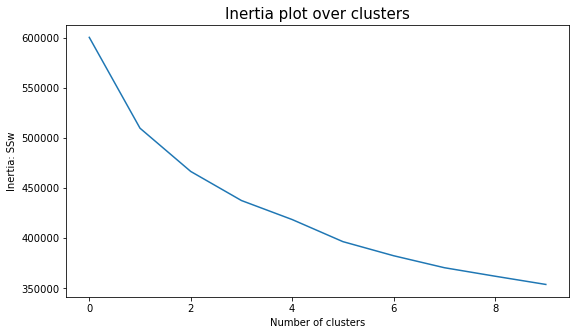

In [49]:
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

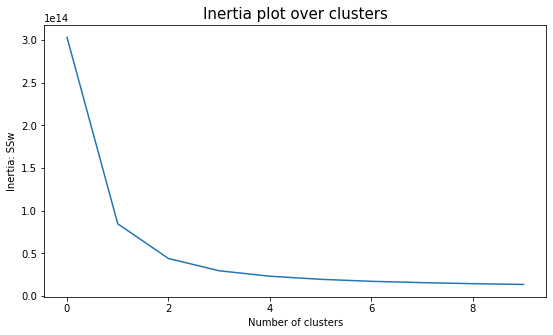

In [25]:
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

For n_clusters = 2, the average silhouette_score is : 0.590468257244245
For n_clusters = 3, the average silhouette_score is : 0.5260749618556404
For n_clusters = 4, the average silhouette_score is : 0.4850850306441294
For n_clusters = 5, the average silhouette_score is : 0.44377548627871716
For n_clusters = 6, the average silhouette_score is : 0.4105184781481075
For n_clusters = 7, the average silhouette_score is : 0.3864286502473491
For n_clusters = 8, the average silhouette_score is : 0.36479613451790066
For n_clusters = 9, the average silhouette_score is : 0.3692726786472408
For n_clusters = 10, the average silhouette_score is : 0.3459638683561954


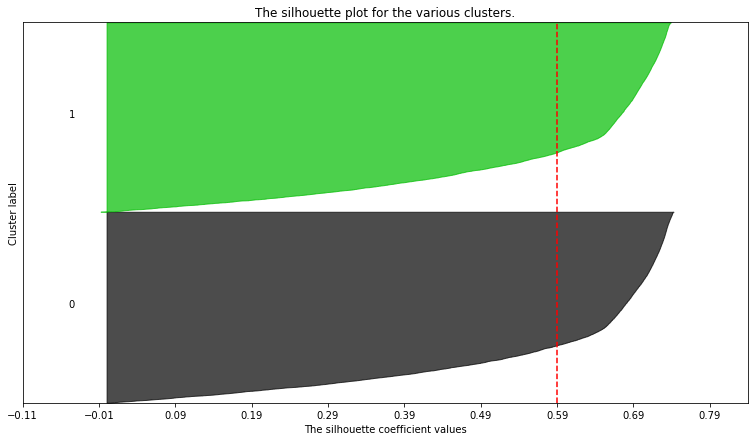

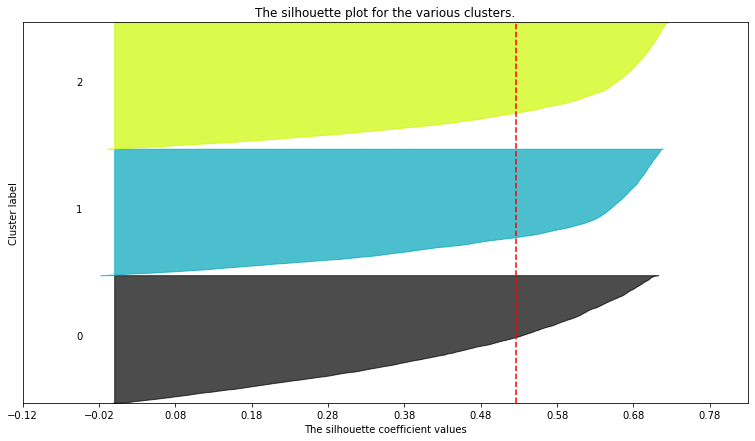

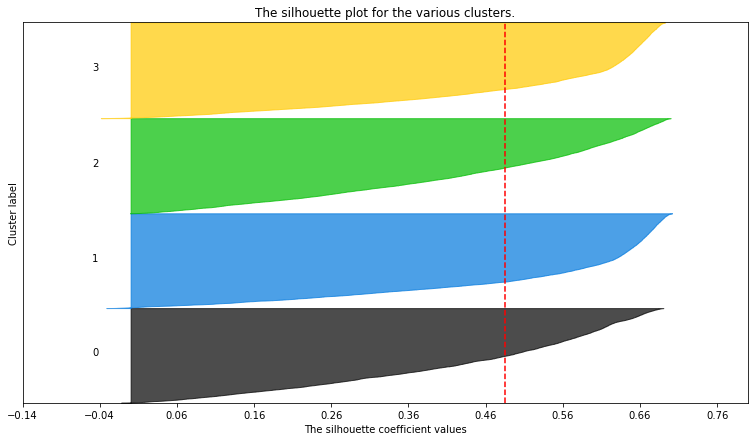

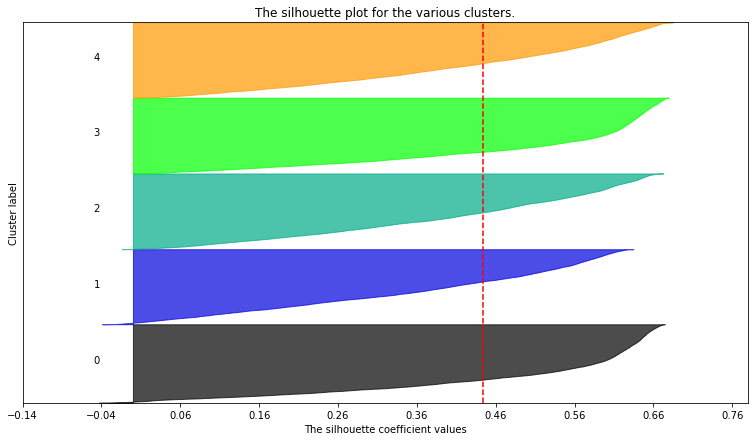

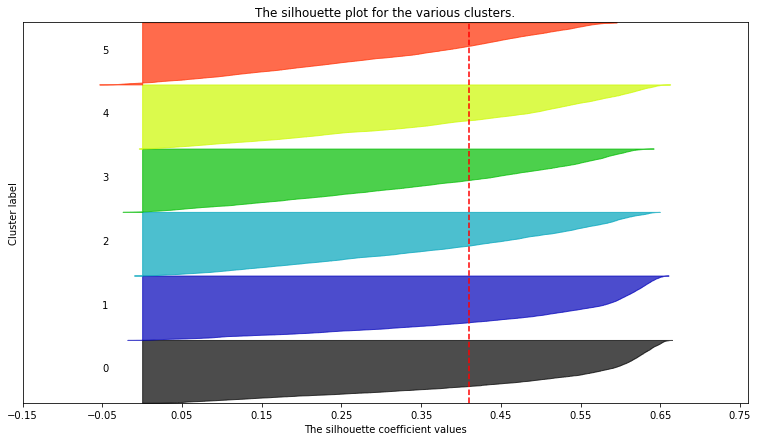

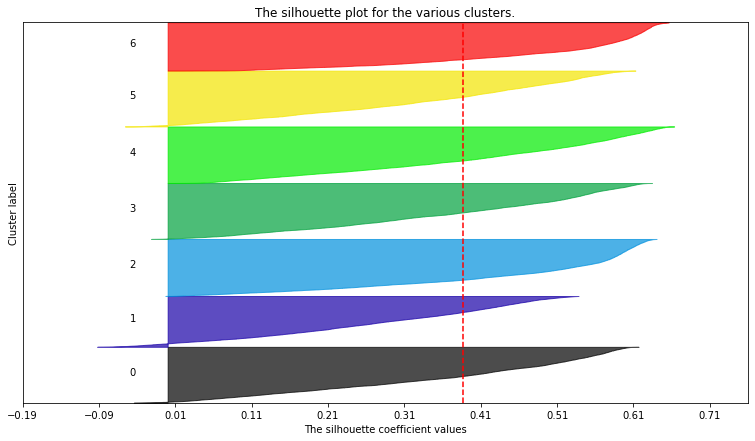

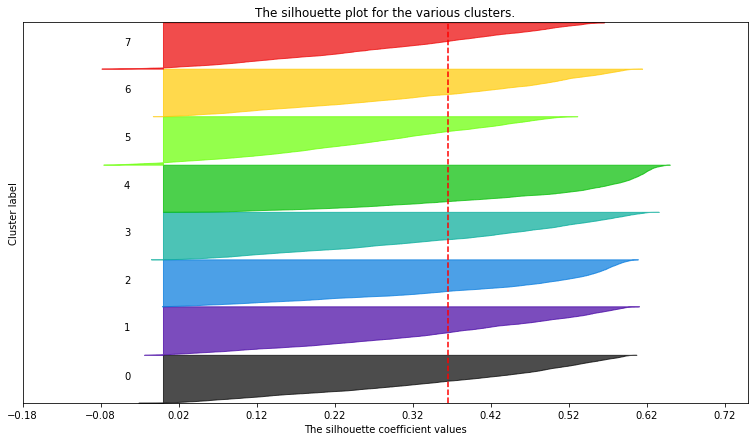

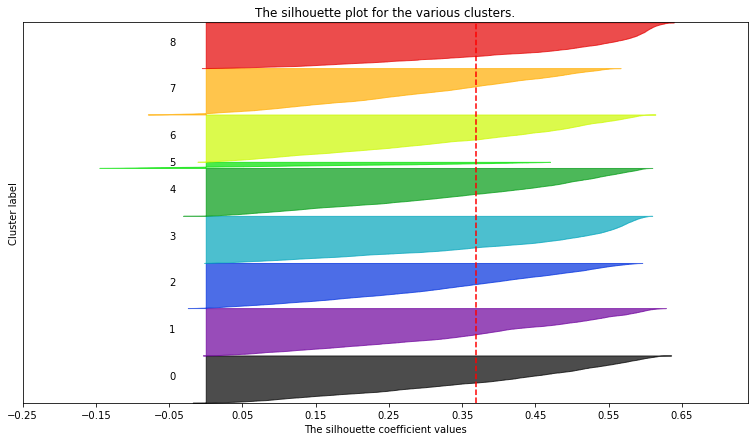

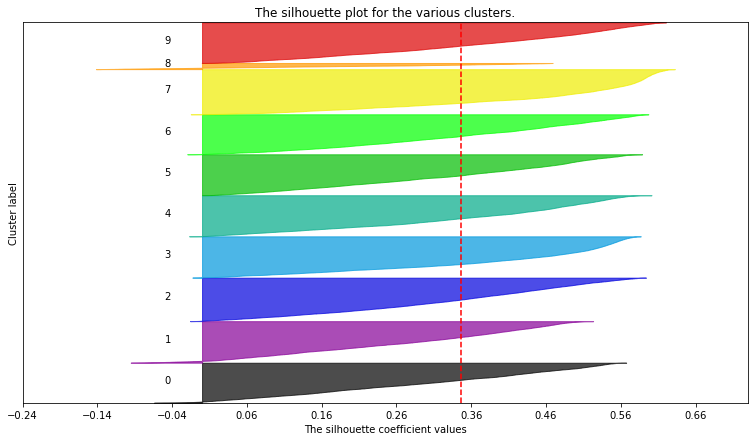

In [27]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df_central)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_central, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_central, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_central) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

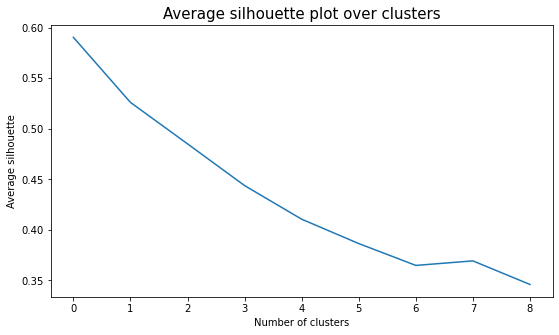

In [28]:
# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(avg_silhouette)
plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

In [22]:
hclust = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=5)
hc_labels = hclust.fit_predict(pca_df)

MemoryError: unable to allocate array data.

In [ ]:
# Computing SST
X = df_central.values
sst = np.sum(np.square(X - X.mean(axis=0)), axis=0)

# Computing SSW
ssw_iter = []
for i in np.unique(hc_labels):
    X_k = X[hc_labels == i]
    ssw_iter.append(np.sum(np.square(X_k - X_k.mean(axis=0)), axis=0))
ssw = np.sum(ssw_iter, axis=0)

# Computing SSB
ssb_iter = []
for i in np.unique(hc_labels):
    X_k = X[hc_labels == i]
    ssb_iter.append(X_k.shape[0] * np.square(X_k.mean(axis=0) - X.mean(axis=0)))
ssb = np.sum(ssb_iter, axis=0)

# Verifying the formula
np.round(sst) == np.round((ssw + ssb))

In [ ]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  # return sum of sum of squares of each df variable
    
    sst = get_ss(df)  # get total sum of squares
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, affinity=dist, linkage=link_method)
        hclabels = cluster.fit_predict(df) #get cluster labels
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels')), axis=1)  # concat df with labels
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
        ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
        r2.append(ssb / sst)  # save the R2 of the given cluster solution
        
    return np.array(r2)

In [ ]:
# Prepare input
hc_methods = ["ward", "complete", "average", "single"]
# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack([get_r2_hc(df=df_central, link_method=link, max_nclus=max_nclus) for link in hc_methods]).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()